In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import OpenSSL.crypto as ssl
import matplotlib, OpenSSL, ssl, subprocess, pickle, collections, datetime, hashlib, os, re, time, sys
from matplotlib.pyplot import MultipleLocator
from brokenaxes import brokenaxes

In [2]:
RESULT_PATH="../performance/hour_scan_result/"
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="#e87722"

In [3]:
def findAllFile(base):
    for root, ds, fs in os.walk(base):
        for f in fs:
            fullname = os.path.join(root, f)
            yield fullname

# 读取数据

In [14]:
bra_scan_dict = {"dot":[],"doh":[], "doudp":[],"dotcp":[],"doq":[]}
cn_scan_dict = {"dot":[],"doh":[], "doudp":[],"dotcp":[],"doq":[]}
us_scan_dict = {"dot":[],"doh":[], "doudp":[],"dotcp":[],"doq":[]}
deu_scan_dict = {"dot":[],"doh":[], "doudp":[],"dotcp":[],"doq":[]}
zaf_scan_dict = {"dot":[],"doh":[], "doudp":[],"dotcp":[],"doq":[]}
aus_scan_dict = {"dot":[],"doh":[], "doudp":[],"dotcp":[],"doq":[]}

for name in findAllFile(RESULT_PATH):
    if ".DS_Store" in name:
        continue
    
    if ".idea" in name:
        continue
    if "hour_scan_result.tar.gz" in name:
        continue
#     print(name)
    loction_name = name.split("/")[3]
    
    date_name = name.split("/")[5]
    time_name = name.split("/")[6]
    net_name = name.split("/")[7]
    dns_type = name.split("/")[8]
    file_name = name.split("/")[-1]
#     print(name)
    if file_name == "result_success.txt" and net_name == "normal":
        
        raw_data = pd.read_csv(name,names=['ip'])
        raw_len = len(raw_data)/1274*100
        if loction_name == "BRA":
            bra_scan_dict[dns_type].append(raw_len)
        elif loction_name == "AUS":
            aus_scan_dict[dns_type].append(raw_len)
        elif loction_name == "CN":
            cn_scan_dict[dns_type].append(raw_len)
        elif loction_name == "US":
            us_scan_dict[dns_type].append(raw_len)
        elif loction_name == "DEU":
            deu_scan_dict[dns_type].append(raw_len)
        elif loction_name == "ZAF":
            zaf_scan_dict[dns_type].append(raw_len)
    
    

In [15]:
from numpy import *
def convert_dict(raw_dict):
    out_list = [0,0,0,0,0]
    for index,value in raw_dict.items():
        if index == "doudp":
            out_list[0] = mean(value)
        elif index == "dotcp":
            out_list[1] = mean(value)
        elif index == "dot":
            out_list[2] = mean(value)
        elif index == "doh":
            out_list[3] = mean(value)
        elif index == "doq":
            out_list[4] = mean(value)
    return out_list

In [16]:
us_reach_list = convert_dict(us_scan_dict)
deu_reach_list = convert_dict(deu_scan_dict)
bra_reach_list = convert_dict(bra_scan_dict)
aus_reach_list = convert_dict(aus_scan_dict)
zaf_reach_list = convert_dict(zaf_scan_dict)
cn_reach_list = convert_dict(cn_scan_dict)

In [22]:
data = []

data.append(us_reach_list)
data.append(deu_reach_list)
data.append(cn_reach_list)
data.append(bra_reach_list)
data.append(aus_reach_list)
data.append(zaf_reach_list)
data=pd.DataFrame(data)

data.columns =['DoUDP','DoTCP','DoT','DoH','DoQ']
data.index = ['US','DE','CN','BR','AU','ZA']
data = data.T

# 画图

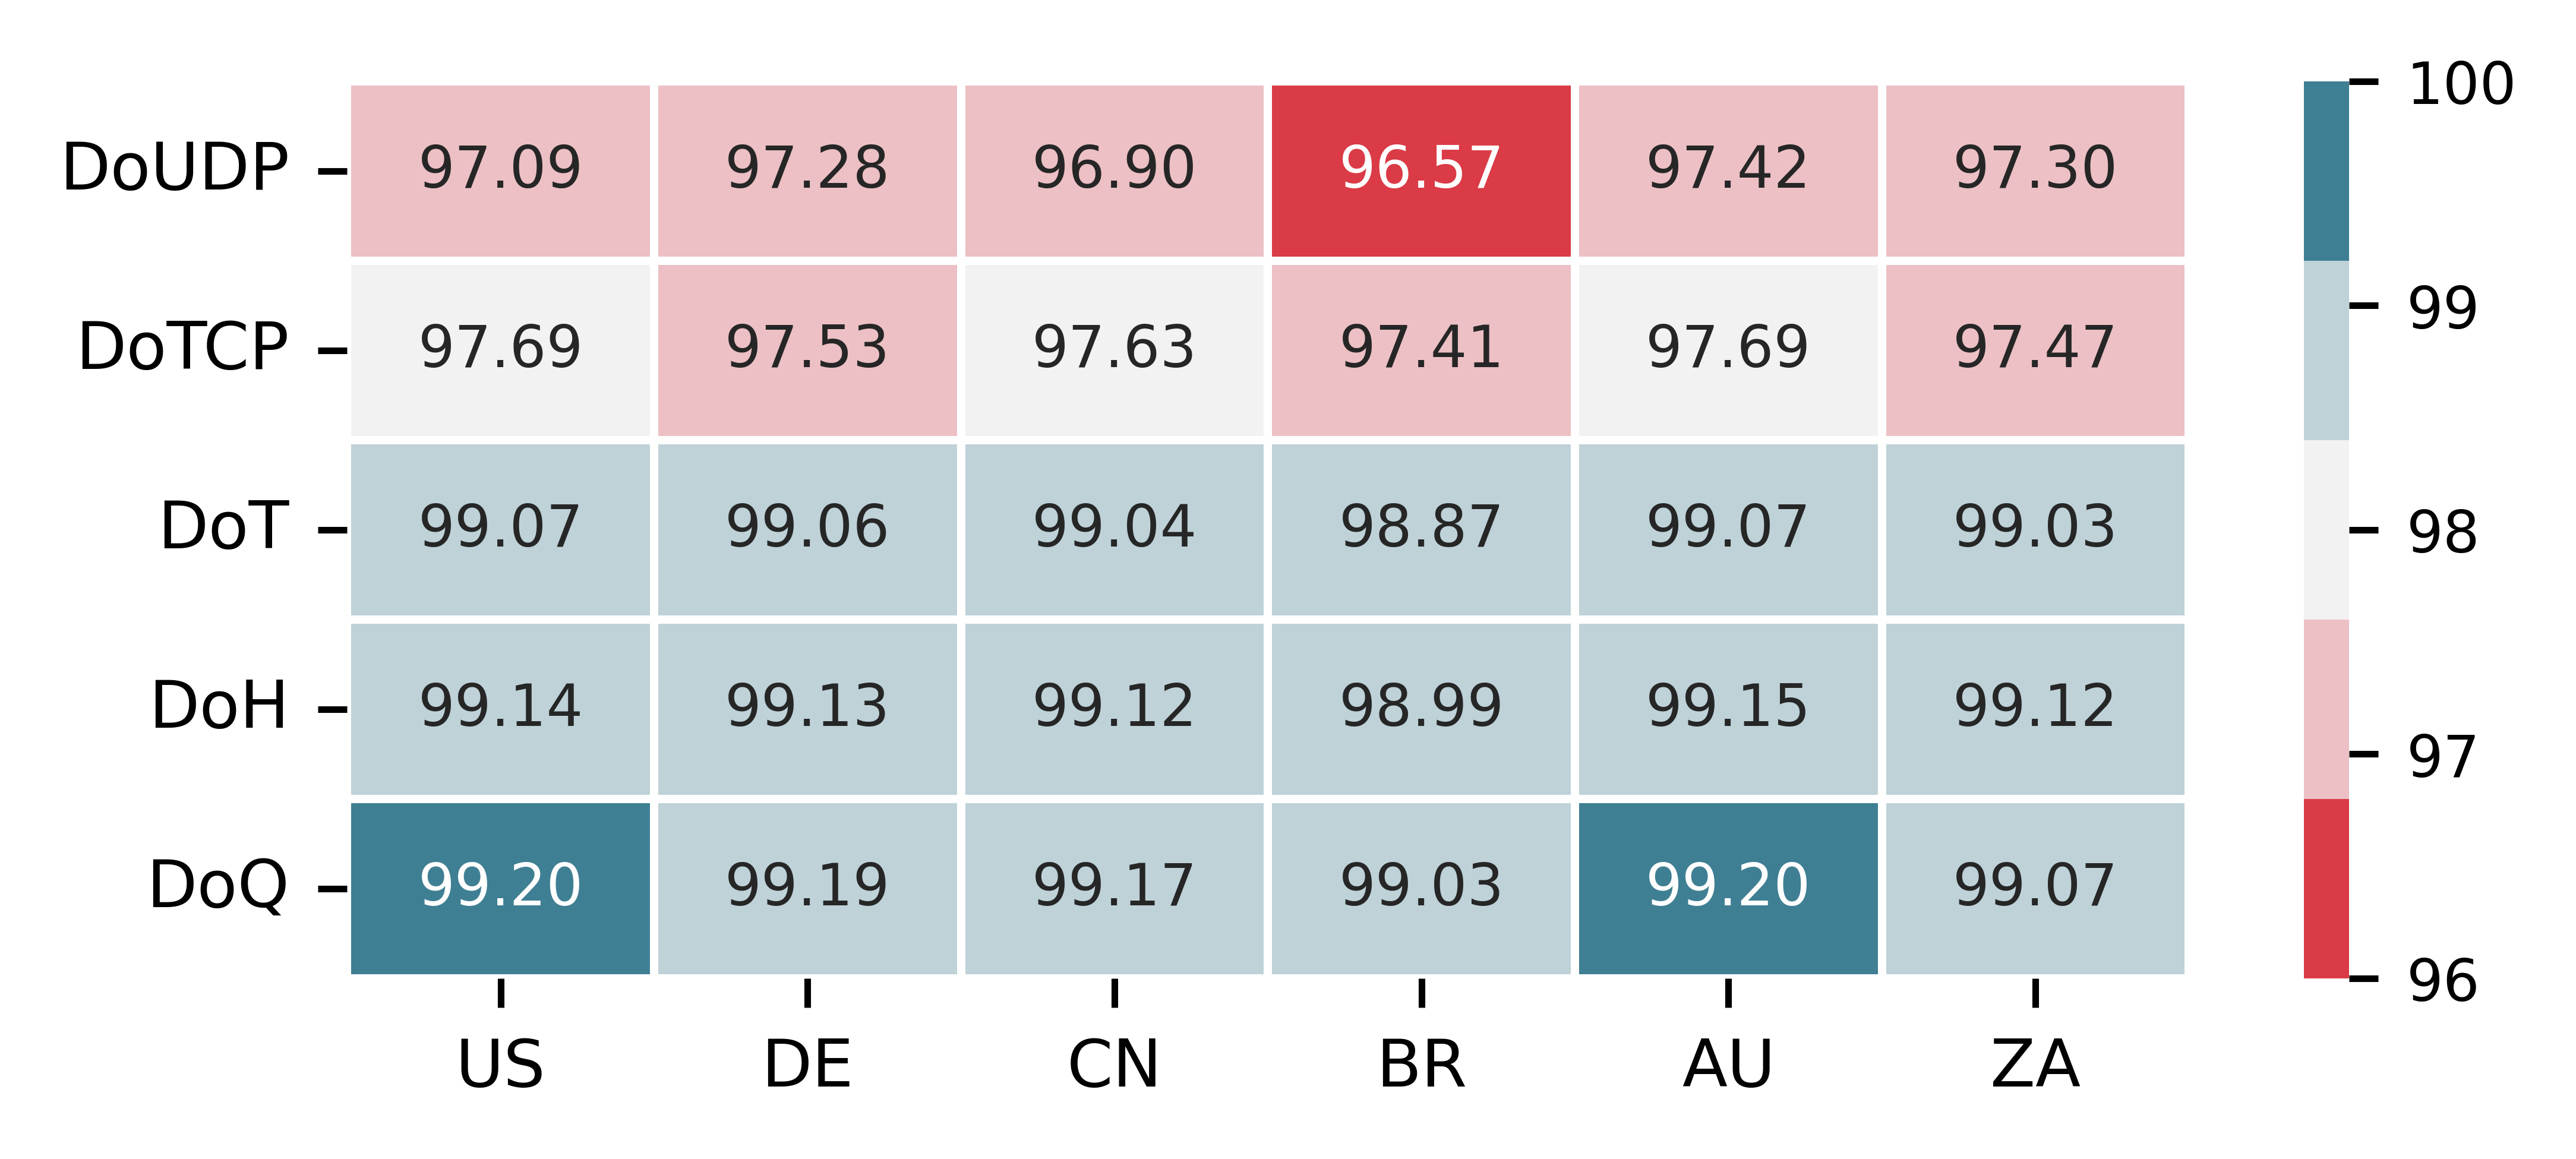

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# import palettes
# from palettable.colorbrewer.qualitative import Dark2_7_r,Dark2_7
#练习的数据：
# data=np.arange(25).reshape(5,5)
# print(data)
# data=pd.DataFrame(data)
# print(data)
#绘制热度图：
plt.figure(dpi=1000,figsize=(5,2))
ax=sns.heatmap(data,vmin=96,vmax=100,cmap=sns.diverging_palette(10, 220, sep=80, n=5),
                 annot=True,fmt=".2f",linewidths=1,annot_kws={"fontsize":7})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=7)
plt.yticks(rotation=0,fontsize=8)
plt.xticks(fontsize=8)
plt.savefig("./fig/heatmap-access.pdf",bbox_inches = 'tight')
plt.show()